<a href="https://colab.research.google.com/github/20WH1A6653/MACHINE-LEARNING-PROJECT/blob/main/ClassificationEmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Wise ML Project/Copy of train.csv')

#EDA

In [ ]:
df.shape

(1677, 35)

In [ ]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
df.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


#Data Visualization

In [ ]:
import seaborn as sns

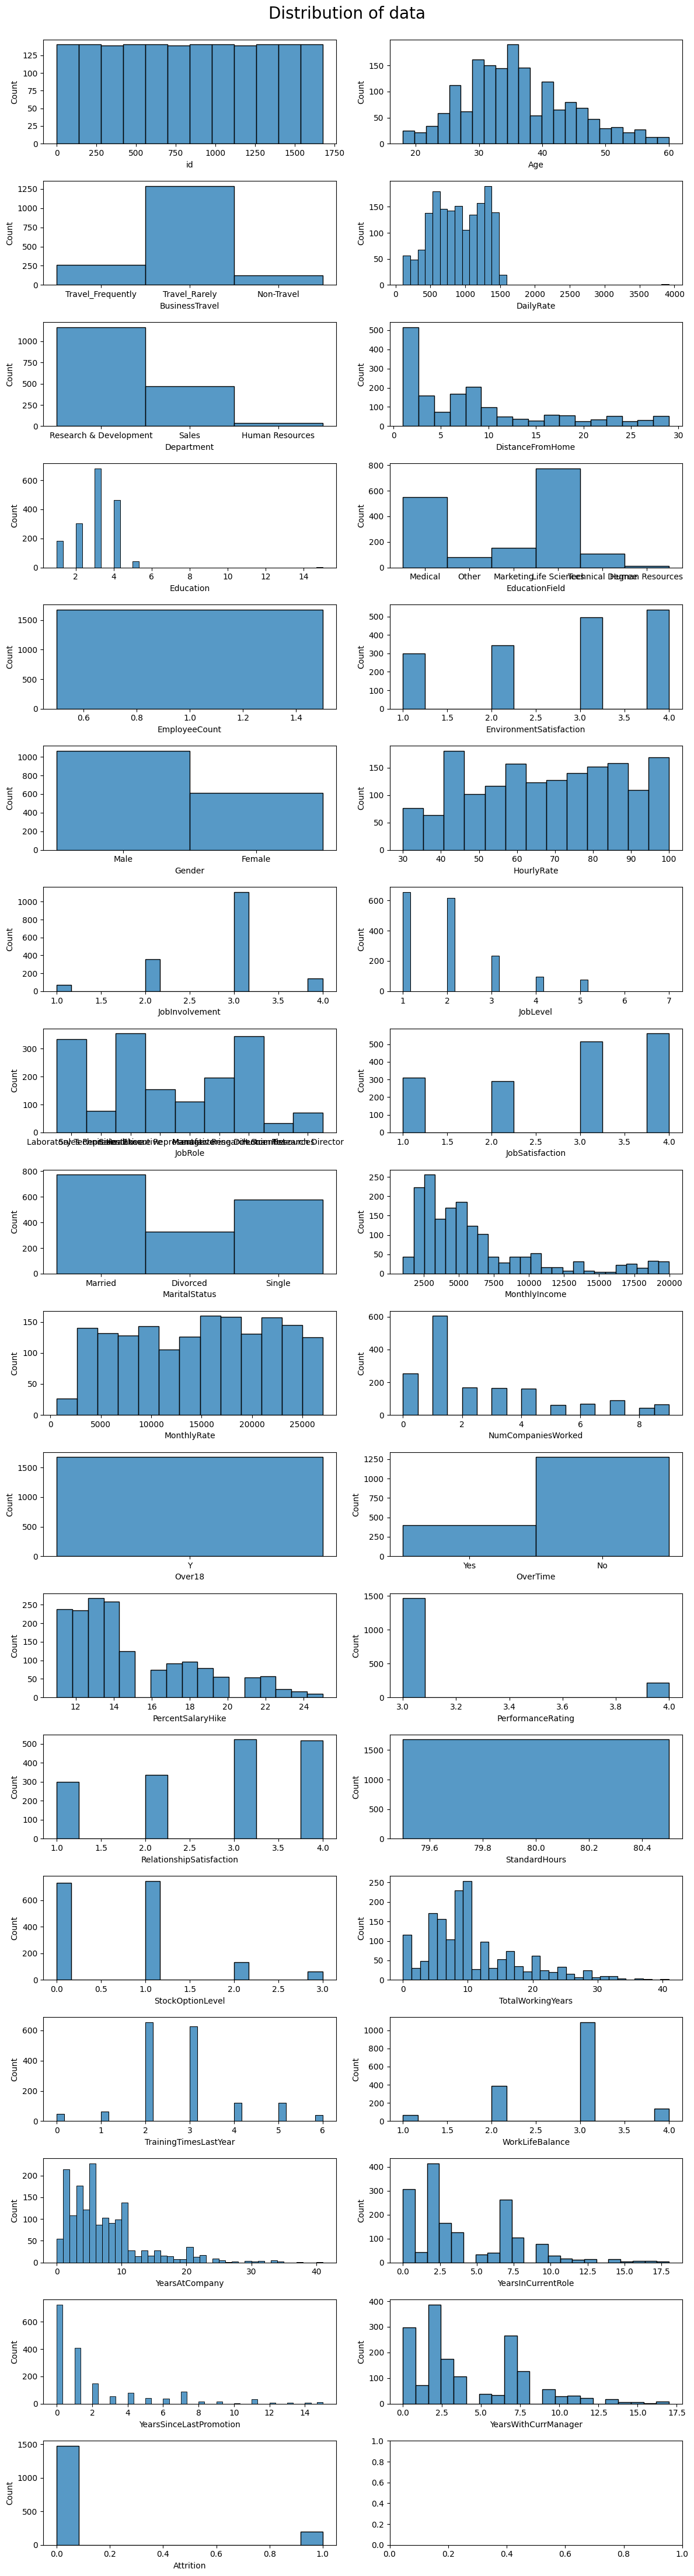

In [ ]:
ncols = 2
nrows = np.ceil(len(df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df.columns, axs.flatten()):
    sns.histplot(df, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

<Axes: >

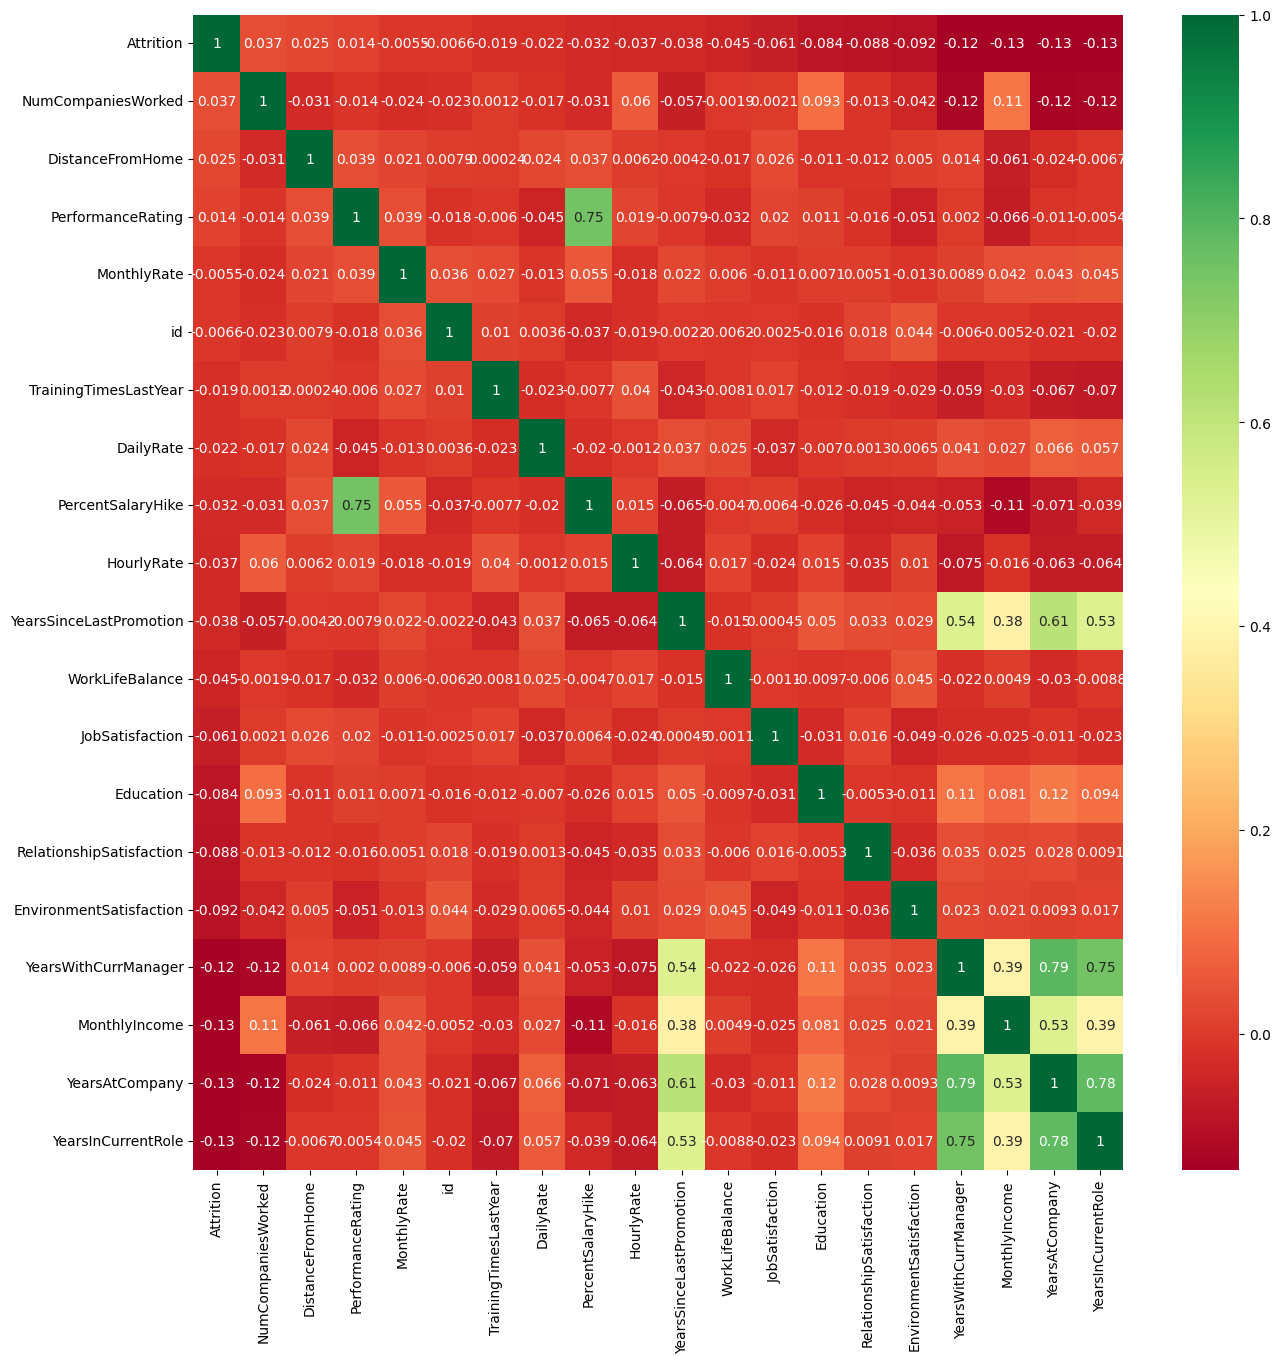

In [ ]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

Analysis of Heat map

In [ ]:
df['Attrition'].value_counts()

0    1477
1     200
Name: Attrition, dtype: int64

In [ ]:
print(df.columns)

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')


In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())

    print("\n")





BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64




Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64






EducationField : ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64






Gender : ['Male' 'Female']
Male      1064
Female     613
Name: Gender, dtype: int64








JobRole : ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
Sales Executive              355
R

In [ ]:
for column in df.columns:
    if df[column].dtype != object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())

    print("\n")

id : [   0    1    2 ... 1674 1675 1676]
0       1
1153    1
1125    1
1124    1
1123    1
       ..
556     1
555     1
554     1
553     1
1676    1
Name: id, Length: 1677, dtype: int64


Age : [36 35 32 38 50 27 34 40 51 25 29 48 26 39 33 52 42 30 43 24 41 47 31 56
 44 28 46 18 45 37 49 53 54 23 59 22 55 20 57 19 21 58 60]
36    101
29     96
34     95
31     90
35     89
38     88
40     79
27     67
30     66
28     62
32     60
37     58
39     54
33     50
46     47
26     45
45     41
41     40
44     39
42     36
25     36
43     29
50     29
48     28
24     23
47     22
23     20
49     19
52     18
55     17
21     16
53     15
51     14
22     14
19     13
18     12
56     10
59     10
58      9
54      7
20      6
57      4
60      3
Name: Age, dtype: int64




DailyRate : [ 599  921  718 1488 1017  566  944 1009 1297  806  885  694  138 1287
  884  640  894  607 1495 1092 1392 1082 1107  530  746 1005  796  228
 1358  959 1276 1349  154 1277  979  300  555  874 1443  933

In [ ]:
column1 = 'StandardHours'

print(str(column1) + ' : ' + str(df[column1].unique()))
print(df[column1].value_counts())

StandardHours : [80]
80    1677
Name: StandardHours, dtype: int64


In [ ]:
column1 = 'EmployeeCount'

print(str(column1) + ' : ' + str(df[column1].unique()))
print(df[column1].value_counts())

EmployeeCount : [1]
1    1677
Name: EmployeeCount, dtype: int64


#Preprocessing

In [ ]:
df = df.drop('id', axis = 1)

df = df.drop('StandardHours', axis = 1)

df = df.drop('EmployeeCount', axis = 1)

df = df.drop('Over18', axis = 1)

In [ ]:
df["BusinessTravel"] = df["BusinessTravel"].replace({"Travel_Frequently" : 0, "Travel_Rarely" : 1, "Non-Travel" : 2})
df["Department"] = df["Department"].replace({"Research & Development" : 0, "Sales" : 1, "Human Resources" : 2})
df["EducationField"] = df["EducationField"].replace({"Medical" : 0, "Other" : 1, "Marketing" : 2, "Life Sciences" : 3, "Technical Degree" : 4, "Human Resources" : 5})
df["Gender"] = df["Gender"].replace({"Male" : 0, "Female" : 1})
df["JobRole"] = df["JobRole"].replace({"Laboratory Technician" : 0, "Sales Representative" : 1, "Sales Executive" : 2, "Healthcare Representative" : 3, "Manager" : 4, "Manufacturing Director" : 5, "Research Scientist" : 6, "Human Resources" : 7, "Research Director" : 8})
df["MaritalStatus"] = df["MaritalStatus"].replace({"Married" : 0, "Single" : 1, "Divorced" : 2})
df["OverTime"] = df["OverTime"].replace({"No" : 0, "Yes" : 1})

In [ ]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,0,599,0,24,3,0,4,0,42,...,2,1,10,2,3,10,0,7,8,0
1,35,1,921,1,8,3,1,1,0,46,...,4,1,4,3,3,4,2,0,3,0
2,32,1,718,1,26,3,2,3,0,80,...,4,2,4,3,3,3,2,1,2,0
3,38,1,1488,0,2,3,0,3,1,40,...,3,0,15,1,1,6,0,0,2,0
4,50,1,1017,0,5,4,0,2,1,37,...,3,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,1,945,1,1,3,3,4,1,73,...,2,0,10,2,4,10,0,0,8,0
1673,32,1,1303,0,2,3,3,1,0,48,...,4,1,10,3,4,4,2,1,3,0
1674,29,0,1184,2,24,3,5,2,0,36,...,3,0,1,2,3,1,0,0,0,1
1675,36,1,441,1,9,2,2,2,0,48,...,3,2,10,3,2,10,3,0,8,0


In [ ]:
df.dtypes

Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

In [ ]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

#Train Test Split and Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1341, 30)
(336, 30)
(1341,)
(336,)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = modelLogistic.predict(X_test)
y_prob = modelLogistic.predict_proba(X_train)[:,1]
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

Metrics of Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate f1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
#fpr, tpr, thresholds = roc_curve(y_test, modelLogistic.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.8839285714285714
Precision: 0.6923076923076923
F1-score: 0.3157894736842105
ROC AUC: 0.595423412204234


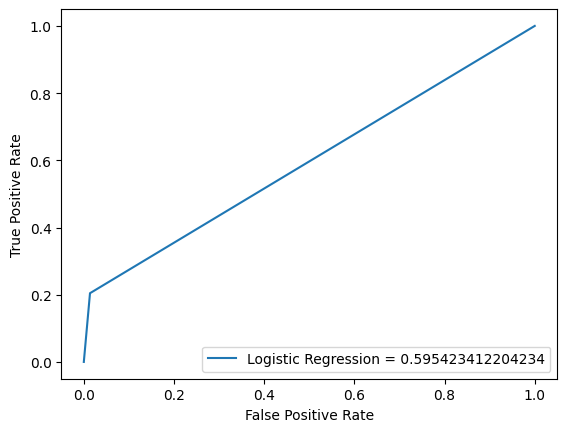

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics

# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auclog = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "Logistic Regression = " + str(roc_auc))

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc = 4)
plt.show()

[[288   4]
 [ 35   9]]


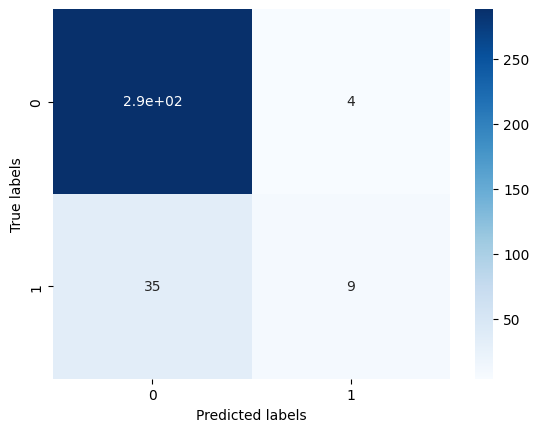

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
LRMetrics = [accuracy, precision, f1, roc_auc]

#Desicion tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_dt = tree_clf.predict(X_test)

# print(y_dt)

In [ ]:
y_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc
accuracy_dt = accuracy_score(y_test, y_dt)

# Calculate precision
precision_dt = precision_score(y_test, y_dt)

# Calculate f1-score
f1_dt = f1_score(y_test, y_dt)

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print the results
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("F1-score:", f1_dt)
print("ROC AUC:", roc_auc_dt)

Accuracy: 0.8303571428571429
Precision: 0.3488372093023256
F1-score: 0.3448275862068966
ROC AUC: 0.6214196762141968


[[264  28]
 [ 29  15]]


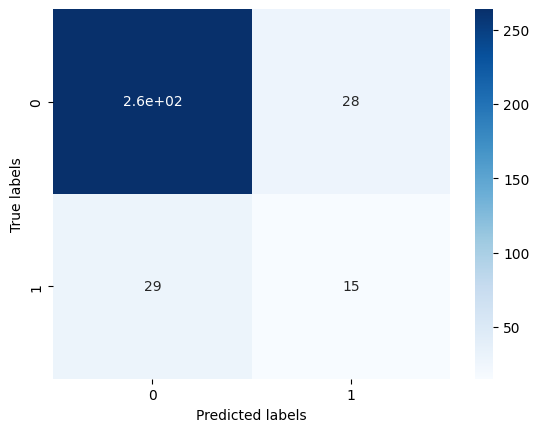

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_dt)
print(confusion_mat)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
y_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

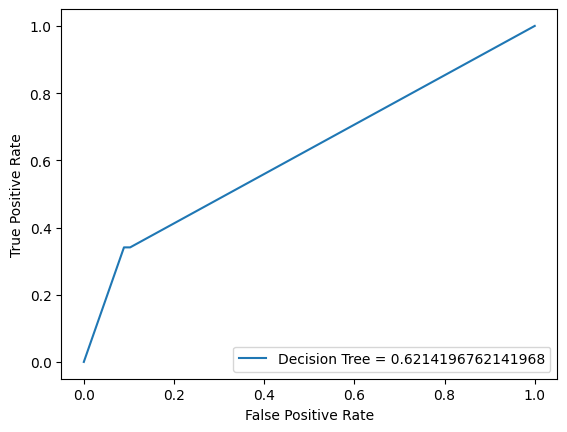

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics


plt.plot(fpr_dt, tpr_dt, label = "Decision Tree = " + str(roc_auc_dt))

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc = 4)
plt.show()

In [ ]:
DTMetrics = [accuracy_dt, precision_dt, f1_dt, roc_auc_dt]

#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_train_pred = rfc.predict(X_test)
rfc_y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Random Forest Classifier Accuracy Score for Train: ", accuracy_score(y_test, rfc_y_train_pred))

Random Forest Classifier Accuracy Score for Train:  0.875


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators':sp_randint(5,150),#nooftrees
    'max_features':sp_randint(1,31),#choose any values betwenn 1-31 features excluding Attrition
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'criterion':['gini','entropy']
}
rsearch = RandomizedSearchCV(rfc, param_distributions=params, n_iter=100, scoring='roc_auc',cv=3, n_jobs=-1)

rsearch.fit(X_train, y_train)

rsearch.best_params_

rfc = RandomForestClassifier(**rsearch.best_params_,random_state=10)
rfc.fit(X_train, y_train)

rfc_y_train_pred = rfc.predict(X_train)
rfc_y_train_prob = rfc.predict_proba(X_train)[:,1]

rfc_y_test_pred = rfc.predict(X_test)
rfc_y_test_prob = rfc.predict_proba(X_test)[:,1]

rfpr,rtpr,rthreshold = roc_curve(y_test, rfc_y_test_prob)

In [ ]:
print("Random Forest Classifier Accuracy Score for Train", accuracy_score(y_train, rfc_y_train_pred))

Random Forest Classifier Accuracy Score for Train 0.8851603281133482


In [ ]:
accuracy_rf = accuracy_score(y_test, rfc_y_test_pred)
print("Random Forest Classifier Accuracy Score for Test", accuracy_score(y_test, rfc_y_test_pred))

Random Forest Classifier Accuracy Score for Test 0.8690476190476191


In [ ]:
aucrfc = roc_auc_score(y_test,rfc_y_test_prob)
print(roc_auc_score(y_test,rfc_y_test_prob))

0.7863480697384807


In [ ]:
f1_rf = f1_score(y_test, rfc_y_test_pred)
print(f1_rf)
precision_rf = precision_score(y_test, rfc_y_test_pred)

# Print the results
# print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("F1-score:", f1_rf)
# print("ROC AUC:", roc_auc_rf)

0.0
Precision: 0.0
F1-score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


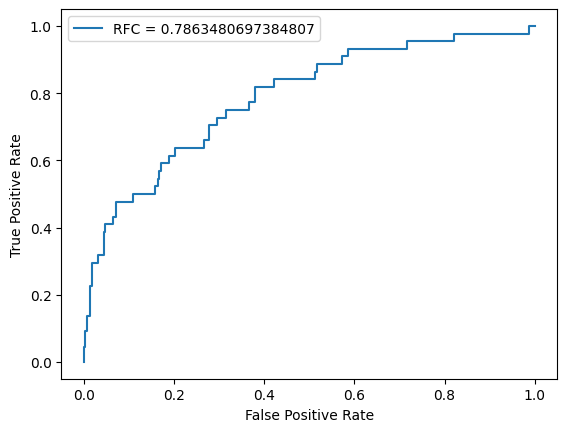

In [ ]:
plt.plot(rfpr, rtpr, label = "RFC = " + str(aucrfc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat_rf = confusion_matrix(y_test,rfc_y_test_pred)
print(confusion_mat_rf)

[[292   0]
 [ 44   0]]


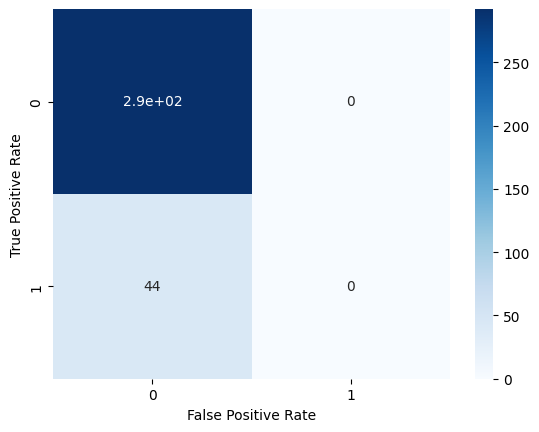

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_mat_rf, annot=True, cmap="Blues")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
RFMetrics = [accuracy_rf, precision_rf, f1_rf, aucrfc]

#XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_train, y_train)
y_predXGB = xgb_model.predict(X_test)
y_prodxgb = xgb_model.predict_proba(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predXGB)
print("Accuracy:", accuracy)
print(y_predXGB)

Accuracy: 0.8779761904761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


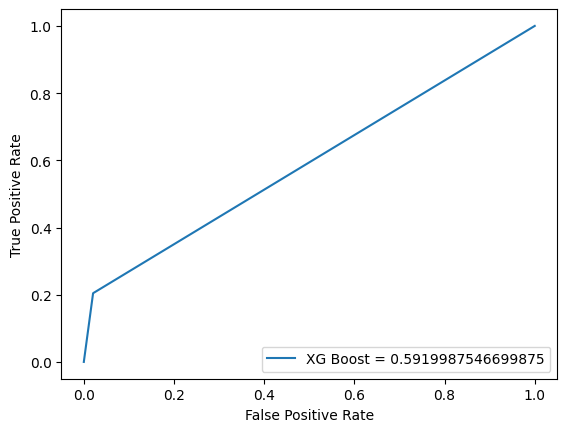

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics

fprXGB, tprXGB, _ = metrics.roc_curve(y_test, y_predXGB)
aucXGB = metrics.roc_auc_score(y_test, y_predXGB)
plt.plot(fprXGB, tprXGB, label = "XG Boost = " + str(aucXGB))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc = 4)
plt.show()

#Light GBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [ ]:
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1)
lgb_model.fit(X_train, y_train)



LGBMClassifier(num_class=1, objective='binary')

In [ ]:
# Making predictions on the test set
y_predlgb = lgb_model.predict(X_test, iter = 100)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predlgb)
print("Accuracy:", accuracy)
y_predlgb

Accuracy: 0.875


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

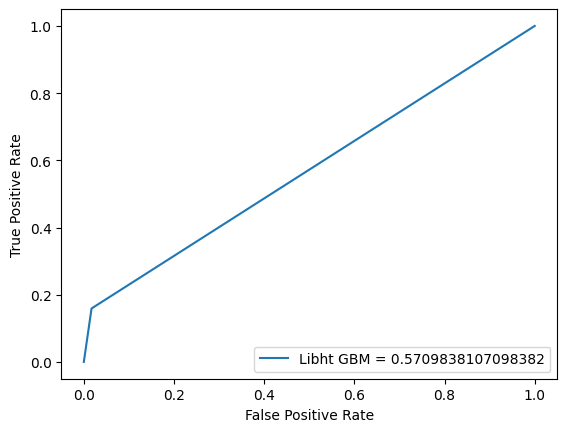

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics

fprlGB, tprlGB, _ = metrics.roc_curve(y_test, y_predlgb)
auclGB = metrics.roc_auc_score(y_test, y_predlgb)
plt.plot(fprlGB, tprlGB, label = "Libht GBM = " + str(auclGB))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc = 4)
plt.show()

#AdaBoostClassifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=rfc, n_estimators=50, random_state=42)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy:  0.8809523809523809
Precision:  0.8333333333333334
F1 score:  0.19999999999999998
ROC:  0.8160024906600248
Confusion Matrix:
  [[291   1]
 [ 39   5]]


Heat map:



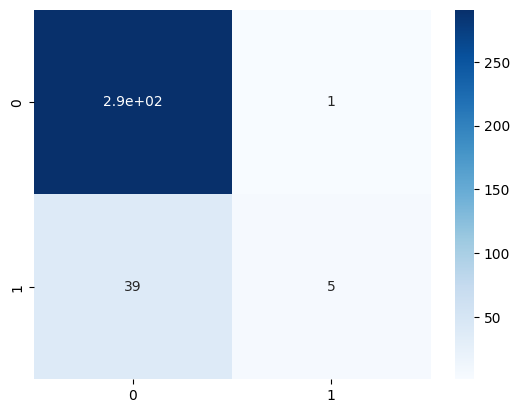

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_ab = accuracy_score(y_test, y_pred)
precision_ab = precision_score(y_test, y_pred)
f1_ab = f1_score(y_test, y_pred)
y_prob_ab = abc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ab)
auc_ab = roc_auc_score(y_test, y_prob_ab)
cm_ab = confusion_matrix(y_test, y_pred)


print("Accuracy: ", accuracy_ab)
print("Precision: ", precision_ab)
print("F1 score: ", f1_ab)
print("ROC: ", auc_ab)
print("Confusion Matrix:\n ", cm_ab)
print("\n")
print("Heat map:\n")
sns.heatmap(cm_ab, annot=True, cmap="Blues")
plt.show()


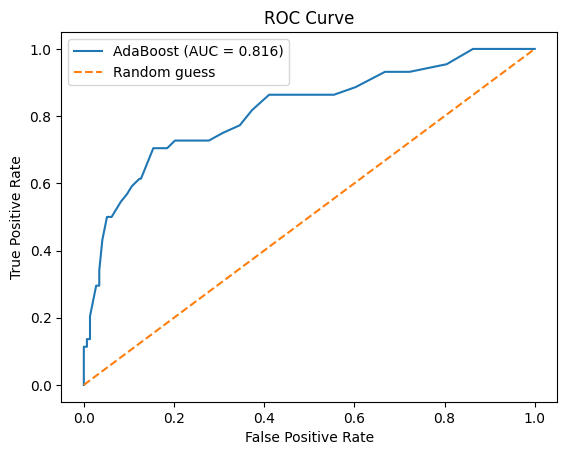

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = abc.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, thresholds = roc_curve(y_test, y_prob)
auc_ab = roc_auc_score(y_test, y_prob)
plt.plot(fpr_ab, tpr_ab, label='AdaBoost (AUC = {:.3f})'.format(auc_ab))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
ABMetrics = [accuracy_ab, precision_ab, f1_ab, auc_ab]

# Submission

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Wise ML Project/Copy of test.csv')

In [ ]:
df_id = df_test["id"]

In [ ]:
df_test = df_test.drop('id', axis = 1)

df_test = df_test.drop('StandardHours', axis = 1)

df_test = df_test.drop('EmployeeCount', axis = 1)

df_test = df_test.drop('Over18', axis = 1)

In [ ]:
df_test["BusinessTravel"] = df_test["BusinessTravel"].replace({"Travel_Frequently" : 0, "Travel_Rarely" : 1, "Non-Travel" : 2})
df_test["Department"] = df_test["Department"].replace({"Research & Development" : 0, "Sales" : 1, "Human Resources" : 2})
df_test["EducationField"] = df_test["EducationField"].replace({"Medical" : 0, "Other" : 1, "Marketing" : 2, "Life Sciences" : 3, "Technical Degree" : 4, "Human Resources" : 5})
df_test["Gender"] = df_test["Gender"].replace({"Male" : 0, "Female" : 1})
df_test["JobRole"] = df_test["JobRole"].replace({"Laboratory Technician" : 0, "Sales Representative" : 1, "Sales Executive" : 2, "Healthcare Representative" : 3, "Manager" : 4, "Manufacturing Director" : 5, "Research Scientist" : 6, "Human Resources" : 7, "Research Director" : 8})
df_test["MaritalStatus"] = df_test["MaritalStatus"].replace({"Married" : 0, "Single" : 1, "Divorced" : 2})
df_test["OverTime"] = df_test["OverTime"].replace({"No" : 0, "Yes" : 1})

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_test = scale.fit_transform(df_test)

In [ ]:
df_pred = abc.predict(df_test)
df_prob = abc.predict_proba(df_test)[:,1]
df_prob = df_prob.round(2)
df_prob

array([0.22, 0.09, 0.04, ..., 0.01, 0.04, 0.03])

In [ ]:


submission_df = pd.DataFrame({"Attrition" : df_prob})
submission_df
result = pd.merge(df_id, submission_df,left_index = True, right_index = True, how = 'left')
result.head()
datatoexcel = pd.ExcelWriter('submission.xlsx')
result.to_excel(datatoexcel)
datatoexcel.save()



#Comparision Table

In [ ]:
row_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost']
col_names = ['Accuracy', 'Precision', 'F1 Score', 'ROC']
data = [LRMetrics, DTMetrics, RFMetrics, ABMetrics]
df = pd.DataFrame(data, index=row_names, columns=col_names)
df

,Accuracy,Precision,F1 Score,ROC
Logistic Regression,0.883929,0.692308,0.315789,0.595423
Decision Tree,0.842262,0.404255,0.417582,0.667497
Random Forest,0.869048,0.000000,0.000000,0.786348
AdaBoost,0.880952,0.833333,0.200000,0.816002


#ROC

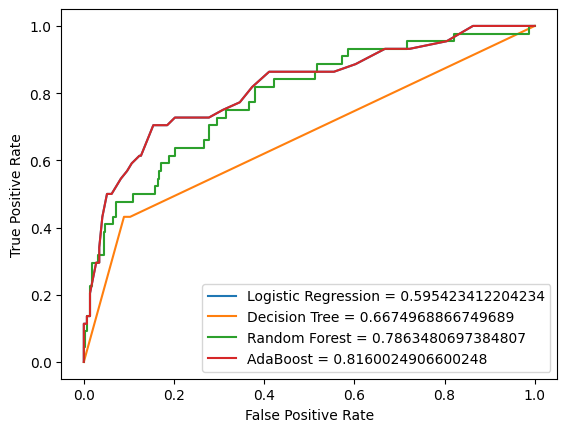

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics


plt.plot(fpr, tpr, label = "Logistic Regression = " + str(roc_auc))

plt.plot(fpr_dt, tpr_dt, label = "Decision Tree = " + str(roc_auc_dt))

plt.plot(rfpr, rtpr, label = "Random Forest = " + str(aucrfc))

plt.plot(fpr_ab, tpr_ab, label = "AdaBoost = " + str(auc_ab))



plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc = 4)
plt.show()

#GRADIO

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 K

In [ ]:
import gradio as gr


# Create a function that takes in the 31 input fields and returns a prediction
def make_prediction(Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager):

    # Map categorical variables to numerical values
    business_travel_map = {"Travel_Frequently" : 0, "Travel_Rarely" : 1, "Non-Travel" : 2}
    department_map = {"Research & Development" : 0, "Sales" : 1, "Human Resources" : 2}
    education_field_map = {"Medical" : 0, "Other" : 1, "Marketing" : 2, "Life Sciences" : 3, "Technical Degree" : 4, "Human Resources" : 5}
    gender_map = {"Male" : 0, "Female" : 1}
    job_role_map = {"Laboratory Technician" : 0, "Sales Representative" : 1, "Sales Executive" : 2, "Healthcare Representative" : 3, "Manager" : 4, "Manufacturing Director" : 5, "Research Scientist" : 6, "Human Resources" : 7, "Research Director" : 8}
    marital_status_map = {"Married" : 0, "Single" : 1, "Divorced" : 2}
    Over_Time_map = {"No" : 0, "Yes" : 1}

    business_travel_num = business_travel_map[BusinessTravel]
    department_num = department_map[Department]
    education_field_num = education_field_map[EducationField]
    gender_num = gender_map[Gender]
    job_role_num = job_role_map[JobRole]
    marital_status_num = marital_status_map[MaritalStatus]
    Over_Time_num = Over_Time_map[OverTime]

    # print()

    # Create a list with the numerical values
    # x = [Age, business_travel_num, DailyRate, department_num, DistanceFromHome, Education, education_field_num, EnvironmentSatisfaction, gender_num,
    #    HourlyRate, JobInvolvement, JobLevel, job_role_num, JobSatisfaction, marital_status_num, MonthlyIncome, MonthlyRate, NumCompaniesWorked,
    #    Over_Time_num, PercentSalaryHike, PerformanceRating,
    #    RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
    #    YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
    # print(x)

    input_df = pd.DataFrame([[Age, business_travel_num, DailyRate, department_num, DistanceFromHome, Education, education_field_num, EnvironmentSatisfaction, gender_num,
       HourlyRate, JobInvolvement, JobLevel, job_role_num, JobSatisfaction, marital_status_num, MonthlyIncome, MonthlyRate, NumCompaniesWorked,
       Over_Time_num, PercentSalaryHike, PerformanceRating,
       RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
       YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]],columns=[ 'Age', 'business_travel_num', 'DailyRate', 'department_num', 'DistanceFromHome', 'Education', 'education_field_num', 'EnvironmentSatisfaction', 'gender_num',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'job_role_num', 'JobSatisfaction', 'marital_status_num', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over_Time_num', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

    # Scale the numerical values
    # x_scaled = scaler.transform([x])

    # # Make the prediction
    # res = abc.predict_proba(x_scaled)

    # # Return the probability of attrition
    # return np.round(res[0][1], 6)

    abc_pred = abc.predict_proba(input_df)[:, 1][0]
    return abc_pred

# Create the Gradio interface
Age  = gr.components.Number(label="Age")
    # gr.inputs.Dropdown(choices=["Yes", "No"], label="Attrition"),
BusinessTravel =    gr.components.Dropdown(choices=["Travel_Frequently", "Travel_Rarely", "Non-Travel"], label="BusinessTravel")
DailyRate =    gr.components.Number(label="DailyRate")
Department =   gr.components.Dropdown(choices=["Research & Development", "Sales", "Human Resources"], label="Department")
DistanceFromHome =   gr.components.Number(label="DistanceFromHome")
Education =    gr.components.Number(label="Education")
EducationField =    gr.components.Dropdown(choices=["Medical", "Other", "Marketing", "Life Sciences", "Technical Degree", "Human Resources"], label="EducationField")
EnvironmentSatisfaction =   gr.components.Number(label="EnvironmentSatisfaction")
Gender =    gr.components.Dropdown(choices=["Male", "Female"], label="Gender")
HourlyRate =    gr.components.Number(label="HourlyRate")
JobInvolvement =   gr.components.Number(label="JobInvolvement")
JobLevel =   gr.components.Number(label="JobLevel")
JobRole =    gr.components.Dropdown(choices=["Laboratory Technician", "Sales Representative", "Sales Executive", "Healthcare Representative", "Manager", "Manufacturing Director", "Research Scientist", "Human Resources", "Research Director"], label="JobRole")
JobSatisfaction =  gr.components.Number(label="JobSatisfaction")
MaritalStatus  = gr.components.Dropdown(choices=["Married", "Divorced", "Single"], label="MaritalStatus")
MonthlyIncome =  gr.components.Number(label="MonthlyIncome")
MonthlyRate =    gr.components.Number(label="MonthlyRate")
NumCompaniesWorked =    gr.components.Number(label="NumCompaniesWorked")
OverTime =   gr.components.Dropdown(choices=["Yes", "No"], label="OverTime")
PercentSalaryHike =    gr.components.Number(label="PercentSalaryHike")
PerformanceRating =    gr.components.Number(label="PerformanceRating")
RelationshipSatisfaction =    gr.components.Number(label="RelationshipSatisfaction")
StockOptionLevel =    gr.components.Number(label="StockOptionLevel")
TotalWorkingYears =   gr.components.Number(label="TotalWorkingYears")
TrainingTimesLastYear =  gr.components.Number(label="TrainingTimesLastYear")
WorkLifeBalance =    gr.components.Number(label="WorkLifeBalance")
YearsAtCompany =    gr.components.Number(label="YearsAtCompany")
YearsInCurrentRole =    gr.components.Number(label="YearsInCurrentRole")
YearsSinceLastPromotion =    gr.components.Number(label="YearsSinceLastPromotion")
YearsWithCurrManager=    gr.components.Number(label="YearsWithCurrManager")


# input_text = {Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager}

# output_text = gr.outputs.Textbox(label = "attrition")
# gr.Interface(fn=make_prediction, inputs=[Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager],
# outputs='label', title='employee attrition', examples=[["34", "Travel_Rarely", "515", "Research & Development", "10", "4", "Life Sciences", "1", "2", "Female", "78", "3", "2", "Sales Representative", "2", "Single", "4400", "10961", "0", "No", "14", "3", "3", "8", "80", "1", "10", "3", "5", "0", "1", "3"]]).launch()

# Launch the interface
# iface.launch()

iface = gr.Interface(fn=make_prediction,
                     inputs=[Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager],
                     outputs="text",
                     title="Employee Attrition Prediction",
                     description="Predict if an employee will leave the company based on various factors.")
                    #  examples=[["34", "Travel_Rarely", "515", "Research & Development", "10", "4", "Life Sciences", "2", "Female", "78", "3", "2", "Sales Representative", "2", "Single", "4400", "10961", "No", "14", "3", "3", "8", "1", "10", "3", "5", "0", "1", "3"]])

iface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/gradio/routes.py", line 393, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 1108, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 915, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.9/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-165-bcec5bdd7b08>", line 16, in make_prediction
    business_travel_num = business_travel_map[BusinessTravel]

In [ ]:
input_df = ([[]])

abc_pred = abc.predict_proba(input_df)[:, 1][0]